## Classificação de variáveis

### Importando as bibliotecas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from slugify import slugify
from sklearn.model_selection import train_test_split
#import Levenshtein
#from iowalicor.data.preprocessing import slugify
#from application.app.folder.file import func_name

In [3]:
df_firstn = pd.read_csv("../data/raw/iowa_liquor_train_test_split_sample.csv", nrows=10)
df_firstn

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2364808,S10798700028,02/26/2013,4347,Jeff's Market / Blue Grass,102 W MAYNE,BLUE GRASS,52726,"102 W MAYNE\nBLUE GRASS 52726\n(41.509114, -90...",82.0,...,22155,Wild Turkey 101 Round,12,375,$6.00,$8.99,1,$8.99,0.38,0.10
1,12139684,INV-06802100005,08/22/2017,3651,Wal-Mart 1491 / Indianola,1500 North Jefferson,Indianola,50125,1500 North Jefferson\nIndianola 50125\n,91.0,...,11298,Crown Royal Canadian Whisky,6,1750,$31.99,$47.99,1,$287.94,1.75,0.46
2,31671,S14182900098,08/28/2013,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N LAKE ST,STORM LAKE,50588,"1250 N LAKE ST\nSTORM LAKE 50588\n(42.653594, ...",11.0,...,86688,Firefly Strawberry Moonshine,12,750,$9.88,$14.82,2,$29.64,1.50,0.40
3,1100266,S11292900026,03/26/2013,3756,Main Street Liquors / Manning,316 MAIN ST,MANNING,51455,"316 MAIN ST\nMANNING 51455\n(41.908573, -95.06...",14.0,...,69947,Rumple Minze Peppermint Schnapps Liqueur,12,1000,$15.15,$22.72,1,$22.72,1.00,0.26
4,12120532,INV-06737700004,08/17/2017,4997,Downtown Pantry,"218, 6th Ave #101",Des Moines,50309,"218, 6th Ave #101\nDes Moines 50309\n(41.58568...",77.0,...,89191,Jose Cuervo Especial Reposado Tequila Mini,12,500,$11.50,$17.25,1,$17.25,0.50,0.13
5,11670503,INV-05415200028,06/08/2017,2595,Hy-Vee Wine and Spirits / Denison,"1620 4th Ave, South",Denison,51442,"1620 4th Ave, South\nDenison 51442\n(42.012395...",24.0,...,10828,Crown Royal Northern Harvest Rye,12,750,$17.50,$26.25,2,$26.25,1.50,0.39
6,4543410,S11437200032,04/03/2013,3712,Monte Spirits,109 N 4TH ST,MONTEZUMA,50171,"109 N 4TH ST\nMONTEZUMA 50171\n(41.585429, -92...",79.0,...,77776,Wild Turkey American Honey,12,750,$10.50,$15.75,2,$31.50,1.50,0.40
7,8212094,S29576500047,12/10/2015,2671,Hy-Vee / Jefferson,"106, W WASHINGTON ST",JEFFERSON,50129,"106, W WASHINGTON ST\nJEFFERSON 50129\n(42.017...",37.0,...,10807,Crown Royal Regal Apple,12,750,$15.00,$22.50,60,$1350.00,45.00,11.89
8,1665619,S20509100146,08/06/2014,3495,Great Pastimes,228 N MAIN ST,MONTICELLO,52310,"228 N MAIN ST\nMONTICELLO 52310\n(42.240132, -...",53.0,...,89194,Jose Cuervo Especial Reposado Flask,24,375,$5.50,$8.25,3,$24.75,1.12,0.30
9,1800759,S10087900002,01/16/2013,2535,Hy-Vee Food Store #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265,1700 VALLEY WEST DR\nWEST DES MOINES 50265\n,77.0,...,27290,Iowa Shine,12,375,$10.08,$15.13,12,$181.56,4.50,1.19


## Análise exploratória dataset Iowa_Liquor_Sales

In [4]:
#req_cols=['Date','City','County','Item Description','State Bottle Cost','State Bottle Retail','Volume Sold (Liters)']

### Leitura do dataset gerado pelo train_test_split e atribuindo a uma variável

In [5]:
#dataset = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", usecols=req_cols)
df = pd.read_csv("../data/raw/iowa_liquor_train_test_split_sample.csv",dtype={
    'Invoice/Item Number': str,
    'Date':str,
    'Store Number': float,
    'Store Name': str,
    'Address': str,
    'City': str,
    'Zip Code': str,
    'Store Location': str,
    'County Number': float,
    'County': str,
    'Category': float,
    'Category Name': str,
    'Vendor Number': float,
    'Vendor Name': str,
    'Item Number': float,
    'Item Description': str,
    'Pack': float,
    'Bottle Volume (ml)': int,
    'State Bottle Cost': str,
    'State Bottle Retail': str,
    'Bottles Sold': int,
    'Sale (Dollars)': str,
    'Volume Sold (Liters)': float,
    'Volume Sold (Gallons)': float
})

In [6]:
df.head(2)

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2364808,S10798700028,02/26/2013,4347.0,Jeff's Market / Blue Grass,102 W MAYNE,BLUE GRASS,52726,"102 W MAYNE\nBLUE GRASS 52726\n(41.509114, -90...",82.0,...,22155.0,Wild Turkey 101 Round,12.0,375,$6.00,$8.99,1,$8.99,0.38,0.10
1,12139684,INV-06802100005,08/22/2017,3651.0,Wal-Mart 1491 / Indianola,1500 North Jefferson,Indianola,50125,1500 North Jefferson\nIndianola 50125\n,91.0,...,11298.0,Crown Royal Canadian Whisky,6.0,1750,$31.99,$47.99,1,$287.94,1.75,0.46


### Utilização o train_test_split para dividir o dataset em dados

In [7]:
#X = dataset
#y = dataset

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [9]:
#df = pd.DataFrame(X_test)
#df.head()

In [10]:
#df.to_csv('iowa_liquor_train_test_split_sample.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518216 entries, 0 to 2518215
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Invoice/Item Number    object 
 2   Date                   object 
 3   Store Number           float64
 4   Store Name             object 
 5   Address                object 
 6   City                   object 
 7   Zip Code               object 
 8   Store Location         object 
 9   County Number          float64
 10  County                 object 
 11  Category               float64
 12  Category Name          object 
 13  Vendor Number          float64
 14  Vendor Name            object 
 15  Item Number            float64
 16  Item Description       object 
 17  Pack                   float64
 18  Bottle Volume (ml)     int32  
 19  State Bottle Cost      object 
 20  State Bottle Retail    object 
 21  Bottles Sold           int32  
 22  Sale (Dollars)    

### Limpeza os dados e facilitação da análise

In [12]:
df.columns = [slugify(col, lowercase=True, separator='_') for col in df.columns]
df.columns

Index(['unnamed_0', 'invoice_item_number', 'date', 'store_number',
       'store_name', 'address', 'city', 'zip_code', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

### Escolha das colunas a utilizar

In [13]:
df = df.drop('unnamed_0', 1)
df = df.drop('invoice_item_number', 1)
df = df.drop('volume_sold_gallons', 1)

In [14]:
df.columns

Index(['date', 'store_number', 'store_name', 'address', 'city', 'zip_code',
       'store_location', 'county_number', 'county', 'category',
       'category_name', 'vendor_number', 'vendor_name', 'item_number',
       'item_description', 'pack', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'bottles_sold', 'sale_dollars',
       'volume_sold_liters'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518216 entries, 0 to 2518215
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   store_number         float64
 2   store_name           object 
 3   address              object 
 4   city                 object 
 5   zip_code             object 
 6   store_location       object 
 7   county_number        float64
 8   county               object 
 9   category             float64
 10  category_name        object 
 11  vendor_number        float64
 12  vendor_name          object 
 13  item_number          float64
 14  item_description     object 
 15  pack                 float64
 16  bottle_volume_ml     int32  
 17  state_bottle_cost    object 
 18  state_bottle_retail  object 
 19  bottles_sold         int32  
 20  sale_dollars         object 
 21  volume_sold_liters   float64
dtypes: float64(7), int32(2), object(13)
memory usage: 403.5+ MB


### Substituição dos valores NaN da tabela

In [16]:
df.isnull().values.any()

True

In [17]:
for x in df.columns:
    df[x] = df[x].fillna('0')

In [18]:
df[df['city'] == 'nan'] = 'no_city'

In [19]:
df[df['county'] == 'nan'] = 'no_county'

In [20]:
df[df['item_description'] == 'nan'] = 'no_item_description'

In [21]:
df.isnull().values.any()

False

### Aplicão do slugify  nas colunas com string:

In [22]:
df['store_name']=df['store_name'].apply(slugify)

In [23]:
df['address']=df['address'].apply(slugify)

In [24]:
df['city']=df['city'].apply(slugify)

In [25]:
df['store_location']=df['store_location'].apply(slugify)

In [26]:
df['county']=df['county'].apply(slugify)

In [27]:
df['category_name']=df['category_name'].apply(slugify)

In [28]:
df['vendor_name']=df['vendor_name'].apply(slugify)

In [29]:
df['item_description']=df['item_description'].apply(slugify)

In [31]:
df.head()

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,02/26/2013,4347.0,jeff-s-market-blue-grass,102-w-mayne,blue-grass,52726,102-w-mayne-blue-grass-52726-41-509114-90-765769,82.0,scott,1011200.0,...,campari-skyy,22155.0,wild-turkey-101-round,12.0,375,$6.00,$8.99,1,$8.99,0.38
1,08/22/2017,3651.0,wal-mart-1491-indianola,1500-north-jefferson,indianola,50125,1500-north-jefferson-indianola-50125,91.0,warren,1012100.0,...,diageo-americas,11298.0,crown-royal-canadian-whisky,6.0,1750,$31.99,$47.99,1,$287.94,1.75
2,08/28/2013,2576.0,hy-vee-wine-and-spirits-storm-lake,1250-n-lake-st,storm-lake,50588,1250-n-lake-st-storm-lake-50588-42-653594-95-2...,11.0,buena-vista,1081700.0,...,sazerac-co-inc,86688.0,firefly-strawberry-moonshine,12.0,750,$9.88,$14.82,2,$29.64,1.5
3,03/26/2013,3756.0,main-street-liquors-manning,316-main-st,manning,51455,316-main-st-manning-51455-41-908573-95-065122,14.0,carroll,1081390.0,...,diageo-americas,69947.0,rumple-minze-peppermint-schnapps-liqueur,12.0,1000,$15.15,$22.72,1,$22.72,1.0
4,08/17/2017,4997.0,downtown-pantry,218-6th-ave-101,des-moines,50309,218-6th-ave-101-des-moines-50309-41-585684-93-...,77.0,polk,1022100.0,...,proximo,89191.0,jose-cuervo-especial-reposado-tequila-mini,12.0,500,$11.50,$17.25,1,$17.25,0.5


In [32]:
#remover valores duplicados
#def distance(s1,s2):
    #if Levenshtein.distance(s1,s2) != 0:
        #return s1

### Remoção do cifrão + conversão para float:

In [33]:
#counties = df['county'].unique().astype(str)

In [34]:
df['state_bottle_cost'] = df['state_bottle_cost'].replace({'\$':''}, regex = True).astype(float)

In [35]:
df['state_bottle_retail'] = df['state_bottle_retail'].replace({'\$':''}, regex = True).astype(float)

In [36]:
df['sale_dollars'] = df['sale_dollars'].replace({'\$':''}, regex = True).astype(float)

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df.head()

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,2013-02-26,4347.0,jeff-s-market-blue-grass,102-w-mayne,blue-grass,52726,102-w-mayne-blue-grass-52726-41-509114-90-765769,82.0,scott,1011200.0,...,campari-skyy,22155.0,wild-turkey-101-round,12.0,375,6.00,8.99,1,8.99,0.38
1,2017-08-22,3651.0,wal-mart-1491-indianola,1500-north-jefferson,indianola,50125,1500-north-jefferson-indianola-50125,91.0,warren,1012100.0,...,diageo-americas,11298.0,crown-royal-canadian-whisky,6.0,1750,31.99,47.99,1,287.94,1.75
2,2013-08-28,2576.0,hy-vee-wine-and-spirits-storm-lake,1250-n-lake-st,storm-lake,50588,1250-n-lake-st-storm-lake-50588-42-653594-95-2...,11.0,buena-vista,1081700.0,...,sazerac-co-inc,86688.0,firefly-strawberry-moonshine,12.0,750,9.88,14.82,2,29.64,1.5
3,2013-03-26,3756.0,main-street-liquors-manning,316-main-st,manning,51455,316-main-st-manning-51455-41-908573-95-065122,14.0,carroll,1081390.0,...,diageo-americas,69947.0,rumple-minze-peppermint-schnapps-liqueur,12.0,1000,15.15,22.72,1,22.72,1.0
4,2017-08-17,4997.0,downtown-pantry,218-6th-ave-101,des-moines,50309,218-6th-ave-101-des-moines-50309-41-585684-93-...,77.0,polk,1022100.0,...,proximo,89191.0,jose-cuervo-especial-reposado-tequila-mini,12.0,500,11.50,17.25,1,17.25,0.5


## Explorando o dataset:

### Em qual condado se vendeu mais?

In [39]:
len(df['county'].unique())

104

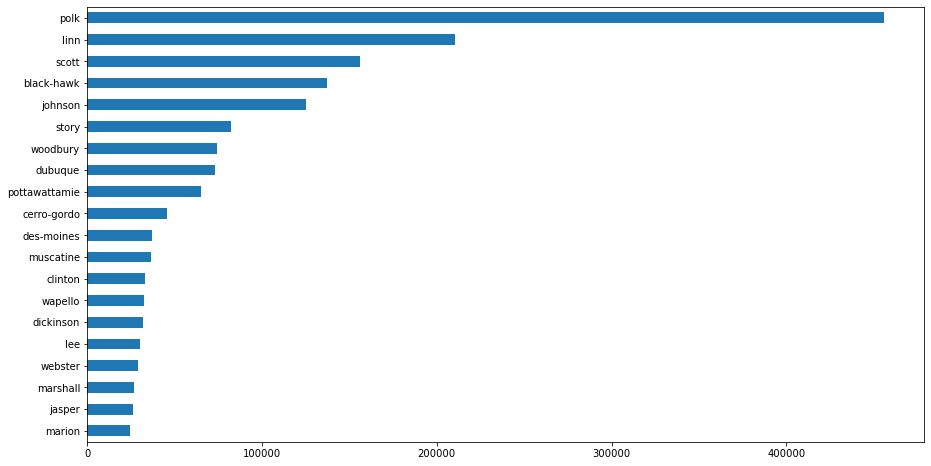

In [40]:
county_sales = df['county'].value_counts().nlargest(20)
county_sales.plot(kind="barh",figsize=(15,8)).invert_yaxis()

### Em qual condado se vendeu menos?

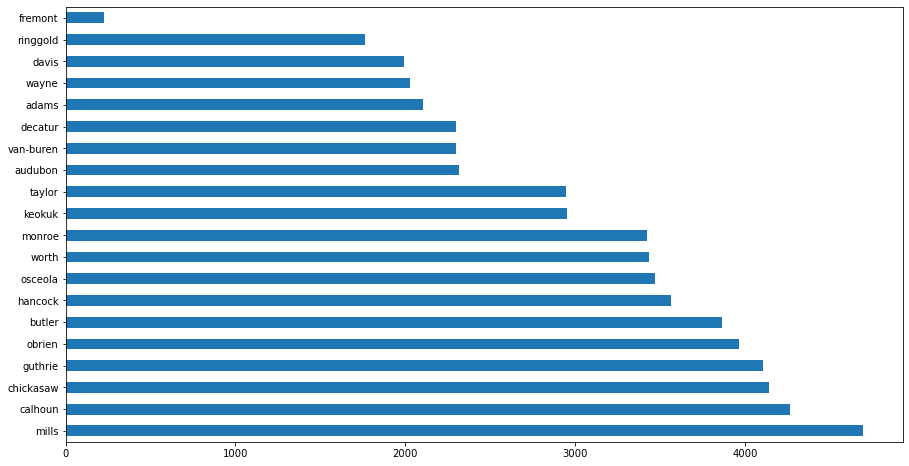

In [41]:
county_sales = df['county'].value_counts().nsmallest(20)
county_sales.plot(kind="barh",figsize=(15,8)).invert_yaxis()

### Sabendo que o condado de POLK foi o que vendeu mais, quais cidades do condado de POLK venderam mais?

#### Filtrando as cidades do condado de POLK

In [43]:
polk = df[df['county']=='polk']
polk.head()

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
4,2017-08-17,4997.0,downtown-pantry,218-6th-ave-101,des-moines,50309,218-6th-ave-101-des-moines-50309-41-585684-93-...,77.0,polk,1022100.0,...,proximo,89191.0,jose-cuervo-especial-reposado-tequila-mini,12.0,500,11.50,17.25,1,17.25,0.5
9,2013-01-16,2535.0,hy-vee-food-store-1-wdm,1700-valley-west-dr,west-des-moines,50265,1700-valley-west-dr-west-des-moines-50265,77.0,polk,1011100.0,...,iowa-distilling-company,27290.0,iowa-shine,12.0,375,10.08,15.13,12,181.56,4.5
11,2015-04-30,2561.0,hy-vee-food-store-fleur-dsm,4605-fleur-drive,des-moines,50321,4605-fleur-drive-des-moines-50321-41-542816-93...,77.0,polk,1032200.0,...,pernod-ricard-usa-austin-nichols,34052.0,absolut-raspberri,12.0,750,11.49,17.24,1,17.24,0.75
16,2014-09-18,4829.0,central-city-2,1501-michigan-ave,des-moines,50314,1501-michigan-ave-des-moines-50314-41-605561-9...,77.0,polk,1081400.0,...,jim-beam-brands,86112.0,dekuyper-triple-sec,12.0,1000,2.22,3.33,12,39.96,12.0
17,2013-05-28,4209.0,wal-mart-5748-grimes,2150-east-1st-st,grimes,50111,2150-east-1st-st-grimes-50111-41-688335-93-771771,77.0,polk,1022100.0,...,the-patron-spirits-company,88296.0,patron-tequila-silver,12.0,750,27.00,40.50,12,486.00,9.0


#### Quais cidades há no condado de POLK?

In [44]:
polk['city'].unique()

array(['des-moines', 'west-des-moines', 'grimes', 'ankeny', 'johnston',
       'clive', 'altoona', 'windsor-heights', 'pleasant-hill',
       'urbandale', 'polk-city', 'bondurant', 'cambridge', 'swisher',
       'runnells', 'mitchellville'], dtype=object)

#### Em quais cidade do condado de POLK se vendeu mais bebida?

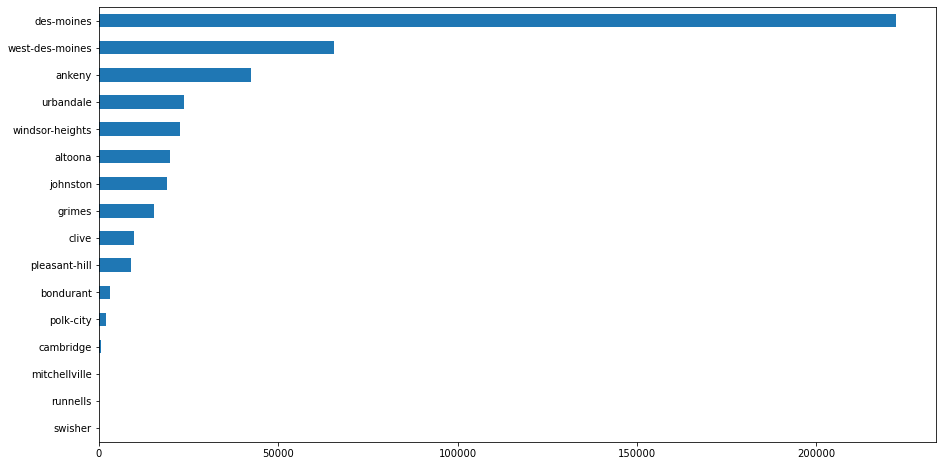

In [45]:
polk['city'].value_counts().plot(kind="barh",figsize=(15,8)).invert_yaxis()

#### Quais cidades no estado do IOWA venderam mais bebida?

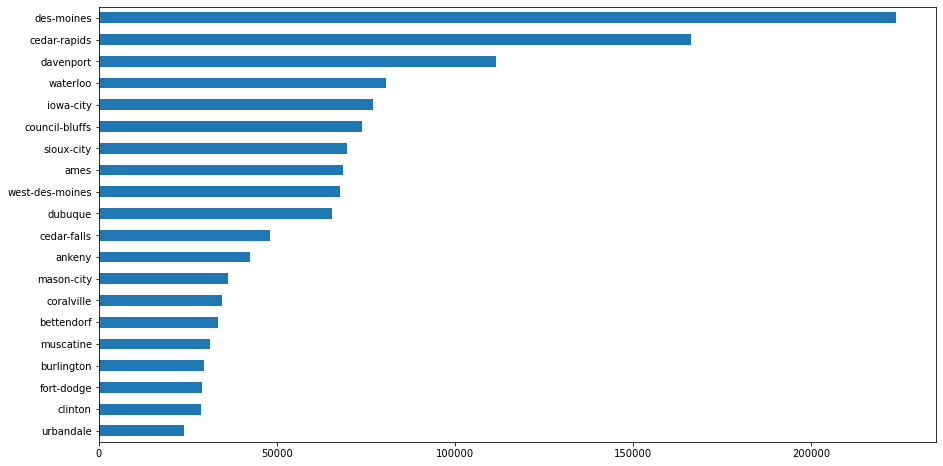

In [46]:
city_sales = df['city'].value_counts().nlargest(20)
city_sales.plot(kind="barh",figsize=(15,8)).invert_yaxis()

#### Quais cidades no estado do IOWA venderam menos bebida?

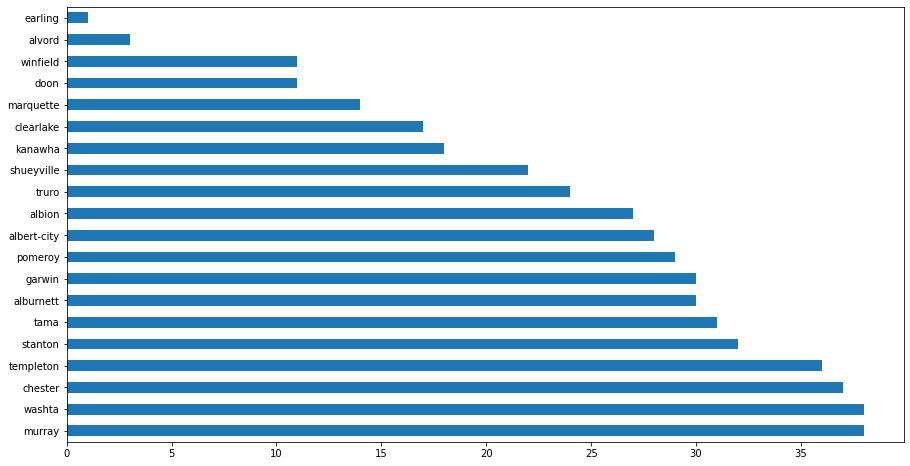

In [47]:
city_sales = df['city'].value_counts().nsmallest(20)
city_sales.plot(kind="barh",figsize=(15,8)).invert_yaxis()

#### Quais a bebida mais vendida?

<BarContainer object of 10 artists>

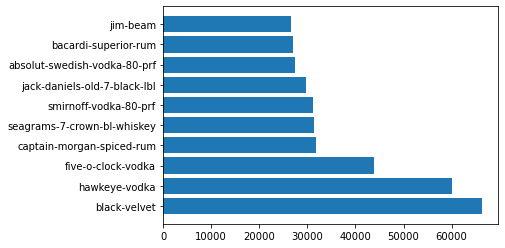

In [56]:
bar_description = df['item_description'].value_counts().nlargest(10).rename_axis('description').reset_index(name='qtt')
plt.barh(bar_description['description'],bar_description['qtt'])

### Analise temporal dos dados

#### Qual a data máxima e mínima?

In [57]:
max(df['date'])

Timestamp('2017-10-31 00:00:00')

In [58]:
min(df['date'])

Timestamp('2012-01-03 00:00:00')

#### 2012

In [59]:
year_2012 = df[df['date'].dt.year == 2012]
year_2012.head(1)

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
18,2012-05-17,2647.0,hy-vee-7-cedar-rapids,5050-edgewood-rd,cedar-rapids,52411,5050-edgewood-rd-cedar-rapids-52411-42-030457-...,57.0,linn,1011200.0,...,campari-skyy,77776.0,wild-turkey-american-honey,12.0,750,9.5,14.75,12,177.0,9.0


In [60]:
volume_per_month_2012 = year_2012['date']

In [61]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().max()

40878

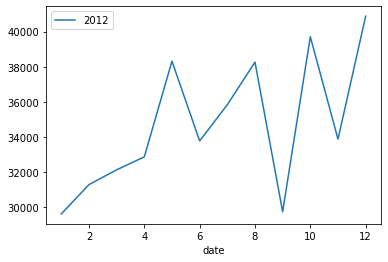

In [62]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().plot(label="2012")
plt.legend()

#### 2013

In [63]:
year_2013 = df[df['date'].dt.year == 2013]
year_2013.head(1)

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,2013-02-26,4347.0,jeff-s-market-blue-grass,102-w-mayne,blue-grass,52726,102-w-mayne-blue-grass-52726-41-509114-90-765769,82.0,scott,1011200.0,...,campari-skyy,22155.0,wild-turkey-101-round,12.0,375,6.0,8.99,1,8.99,0.38


In [64]:
volume_per_month_2013 = year_2013['date']

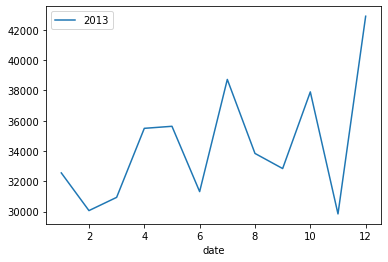

In [65]:
volume_per_month_2013.groupby(volume_per_month_2013.dt.month).count().plot(label="2013")
plt.legend()

#### 2014

In [66]:
year_2014 = df[df['date'].dt.year == 2014]
year_2014.head(1)

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
8,2014-08-06,3495.0,great-pastimes,228-n-main-st,monticello,52310,228-n-main-st-monticello-52310-42-240132-91-18...,53.0,jones,1022100.0,...,proximo,89194.0,jose-cuervo-especial-reposado-flask,24.0,375,5.5,8.25,3,24.75,1.12


In [67]:
volume_per_month_2014 = year_2014['date']

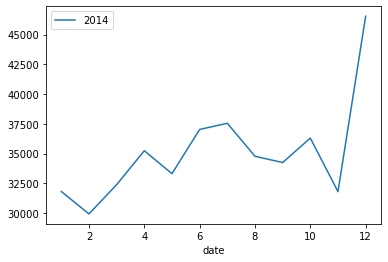

In [68]:
volume_per_month_2014.groupby(volume_per_month_2014.dt.month).count().plot(label="2014")
plt.legend()

#### 2015

In [69]:
year_2015 = df[df['date'].dt.year == 2015]
year_2015.head(1)

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
7,2015-12-10,2671.0,hy-vee-jefferson,106-w-washington-st,jefferson,50129,106-w-washington-st-jefferson-50129-42-017269-...,37.0,greene,1012100.0,...,diageo-americas,10807.0,crown-royal-regal-apple,12.0,750,15.0,22.5,60,1350.0,45.0


In [70]:
volume_per_month_2015 = year_2015['date']

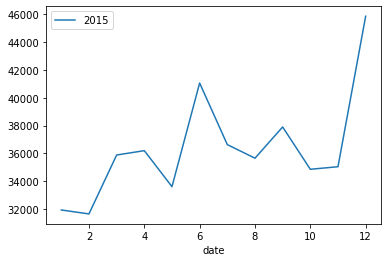

In [71]:
volume_per_month_2015.groupby(volume_per_month_2015.dt.month).count().plot(label="2015")
plt.legend()

#### 2016

In [72]:
year_2016 = df[df['date'].dt.year == 2016]
year_2016.head(1)

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
10,2016-06-22,4670.0,guppy-s-on-the-go-tripoli,600-7th-ave-sw,tripoli,50676,600-7th-ave-sw-tripoli-50676-42-802375-92-264289,9.0,bremer,1062310.0,...,diageo-americas,43337.0,captain-morgan-spiced-rum,12.0,1000,11.75,17.63,4,70.52,4.0


In [73]:
volume_per_month_2016 = year_2016['date']

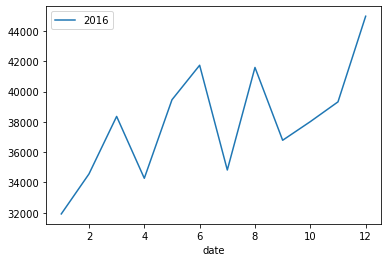

In [74]:
volume_per_month_2016.groupby(volume_per_month_2016.dt.month).count().plot(label="2016")
plt.legend()

#### 2017

In [75]:
year_2017 = df[df['date'].dt.year == 2017]
year_2017.head(1)

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
1,2017-08-22,3651.0,wal-mart-1491-indianola,1500-north-jefferson,indianola,50125,1500-north-jefferson-indianola-50125,91.0,warren,1012100.0,...,diageo-americas,11298.0,crown-royal-canadian-whisky,6.0,1750,31.99,47.99,1,287.94,1.75


In [76]:
volume_per_month_2017 = year_2017['date']

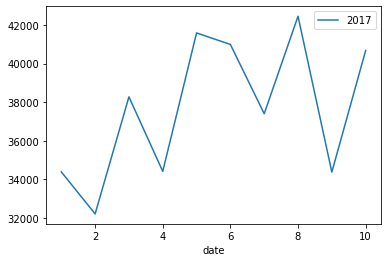

In [77]:
volume_per_month_2017.groupby(volume_per_month_2017.dt.month).count().plot(label="2017")
plt.legend()

#### Todo o período

In [78]:
year1 = [2012,2013,2014,2015,2016,2017]
qtt1 = []
qtt1.append(len(year_2012.index))
qtt1.append(len(year_2013.index))
qtt1.append(len(year_2014.index))
qtt1.append(len(year_2015.index))
qtt1.append(len(year_2016.index))
qtt1.append(len(year_2017.index))
qtt1

[416317, 412095, 420866, 436353, 455792, 376793]

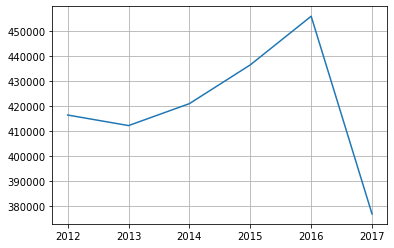

In [79]:
plt.grid(True)
plt.plot(year1, qtt1)

In [80]:
year2 = [2012,2013,2014,2015,2016]
qtt2 = []
qtt2.append(len(year_2012.index))
qtt2.append(len(year_2013.index))
qtt2.append(len(year_2014.index))
qtt2.append(len(year_2015.index))
qtt2.append(len(year_2016.index))
qtt2

[416317, 412095, 420866, 436353, 455792]

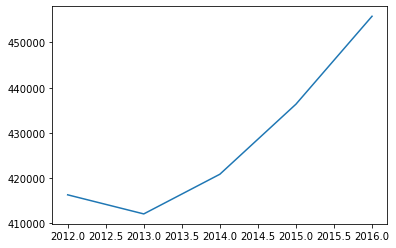

In [81]:
plt.plot(year2, qtt2)
plt.show()

### Cruzamento de dados com população dos condados

#### Preparação dos dados

In [84]:
pop_iowa_data = pd.read_csv("../data/raw/pop_cty_iowa.csv",usecols=['STNAME','CTYNAME','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014',
                                                                          'POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017'],dtype={
    'STNAME': str,
    'POPESTIMATE2012':str,
    'POPESTIMATE2013': str,
    'POPESTIMATE2014': str,
    'POPESTIMATE2015': str,
    'POPESTIMATE2016': str,
    'POPESTIMATE2017': str
})

#### Remoção do termo "County" dos dados da coluna County

In [85]:
pop_iowa_data['CTYNAME'] = pop_iowa_data['CTYNAME'].replace({' County':''}, regex = True).str.lower()

#### Filtrando os dados do estado do IOWA

In [86]:
pop_cty_iowa = pop_iowa_data[pop_iowa_data['STNAME']=="Iowa"]

In [87]:
pop_cty_iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 804 to 903
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STNAME           100 non-null    object
 1   CTYNAME          100 non-null    object
 2   POPESTIMATE2012  100 non-null    object
 3   POPESTIMATE2013  100 non-null    object
 4   POPESTIMATE2014  100 non-null    object
 5   POPESTIMATE2015  100 non-null    object
 6   POPESTIMATE2016  100 non-null    object
 7   POPESTIMATE2017  100 non-null    object
dtypes: object(8)
memory usage: 7.0+ KB


In [88]:
pop_cty_iowa.head()

,STNAME,CTYNAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
804,Iowa,iowa,3076190,3092997,3109350,3120960,3131371,3141550
805,Iowa,adair,7468,7387,7368,7145,7005,7051
806,Iowa,adams,3910,3891,3877,3754,3692,3657
807,Iowa,allamakee,14149,14071,14062,13874,13851,13803
808,Iowa,appanoose,12707,12654,12671,12577,12505,12353


In [89]:
len(pop_cty_iowa['CTYNAME'].unique())

99

In [90]:
pop_cty_iowa[pop_cty_iowa['CTYNAME']=='polk']

,STNAME,CTYNAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
881,Iowa,polk,444671,452657,460898,467304,474277,480487


In [91]:
pop_cty_iowa[pop_cty_iowa['CTYNAME']=='linn']

,STNAME,CTYNAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
861,Iowa,linn,215485,216488,218129,220271,222188,224379


In [92]:
pop_cty_iowa[pop_cty_iowa['CTYNAME']=='scott']

,STNAME,CTYNAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
886,Iowa,scott,168347,170201,171310,171903,172135,172448


#### Padronização de datas